# Spinup in USP mode

In [1]:
from pyclmuapp import usp_clmu

## spinup case

Run 10 year for spinup

The default SET `RUN_TYPE="coldstart"`, the parameters will set to be in a cold state.

In [2]:
usp = usp_clmu()

# before running container, you need the image
# usp.docker("pull") # to pull the docker image if you don't have it
usp_spinup = usp.run(
            case_name = "usp_spinup", 
            SURF="surfdata.nc", # path to surfdata.nc
            FORCING="forcing.nc", # path to forcing.nc
            RUN_STARTDATE = "2002-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "10",
            RUN_TYPE= "coldstart",
        )
usp_spinup

Copying the file forcing.nc to the /Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/usp/workdir/inputfolder/usp


['/Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/usp/workdir/outputfolder/lnd/hist/usp_spinup_clm0_2024-11-23_14-41-16_clm.nc']

In [3]:
usp.nc_view()

<xarray.Dataset> Size: 123MB
Dimensions:             (levgrnd: 25, levlak: 10, levdcmp: 1, time: 175297,
                         hist_interval: 2, lndgrid: 1, column: 6, gridcell: 1,
                         landunit: 2, pft: 6, levsoi: 20)
Coordinates:
  * levgrnd             (levgrnd) float32 100B 0.01 0.04 0.09 ... 28.87 42.0
  * levlak              (levlak) float32 40B 0.05 0.6 2.1 ... 25.6 34.33 44.78
  * levdcmp             (levdcmp) float32 4B 1.0
  * time                (time) datetime64[ns] 1MB 2002-01-01 ... 2012-01-01
Dimensions without coordinates: hist_interval, lndgrid, column, gridcell,
                                landunit, pft, levsoi
Data variables: (12/129)
    mcdate              (time) int32 701kB ...
    mcsec               (time) int32 701kB ...
    mdcur               (time) int32 701kB ...
    mscur               (time) int32 701kB ...
    nstep               (time) int32 701kB ...
    time_bounds         (time, hist_interval) datetime64[ns] 3MB ...
    ...                  ...
    URBAN_AC            (time, gridcell) float32 701kB ...
    URBAN_HEAT          (time, gridcell) float32 701kB ...
    WASTEHEAT           (time, gridcell) float32 701kB ...
    WBT                 (time, gridcell) float32 701kB ...
    Wind                (time, gridcell) float32 701kB ...
    ZWT                 (time, gridcell) float32 701kB ...
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 11/23/24 14:34:27
    source:                                    Community Land Model CLM4.0
    hostname:                                  clmu-app
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          minute_30

## startup

In [4]:
usp = usp_clmu()

usp_london_start = usp.run(
            case_name = "usp_start", 
            SURF="surfdata.nc",
            FORCING="forcing.nc",
            RUN_STARTDATE = "2012-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "2",
            RUN_TYPE= "branch",
            RUN_REFCASE= "usp_spinup",
            RUN_REFDATE= "2012-01-01",
        )
usp_london_start

Copying the file forcing.nc to the /Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/usp/workdir/inputfolder/usp


['/Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/usp/workdir/outputfolder/lnd/hist/usp_start_clm0_2024-11-23_14-43-55_clm.nc']

## no spinup

In [5]:
usp = usp_clmu()

usp_london_start_no = usp.run(
            case_name = "usp_start_no", 
            SURF="surfdata.nc",
            FORCING="forcing.nc",
            RUN_STARTDATE = "2012-01-01",
            STOP_OPTION = "nyears", 
            STOP_N = "2",
            RUN_TYPE= "coldstart",
            RUN_REFCASE= "usp_spinup",
            RUN_REFDATE= "2012-01-01",
        )
usp_london_start_no

Copying the file forcing.nc to the /Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/usp/workdir/inputfolder/usp


['/Users/user/Documents/GitHub/pyclmuapp/docs/notebooks/usp/workdir/outputfolder/lnd/hist/usp_start_no_clm0_2024-11-23_14-46-29_clm.nc']

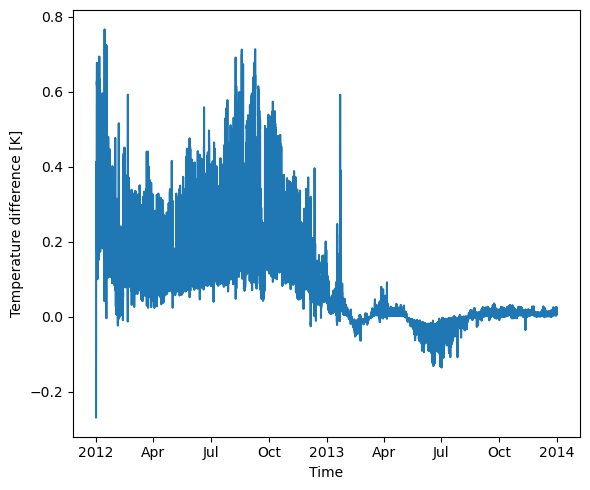

<xarray.DataArray 'TSA' ()> Size: 4B
array(285.07147, dtype=float32)
<xarray.DataArray 'TSA' ()> Size: 4B
array(284.97766, dtype=float32)


In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
usp_london_start_no_nc=usp.nc_view(usp_london_start[0])
usp_london_start_nc=usp.nc_view(usp_london_start_no[0])
diff = usp_london_start_no_nc['TSA']-usp_london_start_nc['TSA']
diff.plot(ax=ax)
ax.set_ylabel('Temperature difference [K]')
ax.set_xlabel('Time')
plt.tight_layout()
plt.savefig('figs/usp_london_spinuptest.pdf', dpi=300)
plt.show()
print(usp_london_start_no_nc['TSA'].mean())
print(usp_london_start_nc['TSA'].mean())